# LNG Price Recoupling and Energy Pool

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

%matplotlib inline

#For warning surpression
warnings.filterwarnings("ignore", category=FutureWarning)
#To reactivate warning
# warnings.filterwarnings("default", category=FutureWarning)

## Electricity Demand (System Load)

https://www.iso-ne.com/isoexpress/

In [2]:
states = ['ISONE CA', 'ME', 'NH', 'VT', 'CT', 'RI', 'SEMASS' ,'WCMASS', 'NEMASSBOST']

state_dfs = [pd.DataFrame(columns=['Date', 'Hour', 'Demand', 'Temperature']) for _ in states]

In [3]:
for year in range(2011, 2018):
    path = f"data/{year}_smd_hourly.xls"
    if year >= 2016:
        for i, state in enumerate(states):
            state_df = pd.read_excel(path, sheet_name = state)
            state_df = state_df[['Date', 'Hr_End', 'RT_Demand', 'Dry_Bulb']]
            state_df = state_df.rename(columns = {'Hr_End' : 'Hour', 'RT_Demand' : 'Demand', 'Dry_Bulb' : 'Temperature'})
            state_df['Date'] = pd.to_datetime(state_df['Date'], format = 'dd-bb-yy')
            
            state_dfs[i] = pd.concat([state_dfs[i], state_df], ignore_index = True)
    else:
        for i, state in enumerate(states):
            state_df = pd.read_excel(path, sheet_name = state)
            state_df = state_df[['Date', 'Hour', 'DEMAND', 'DryBulb']]
            state_df = state_df.rename(columns = {'DEMAND' : 'Demand', 'DryBulb' : 'Temperature'})
            state_df['Date'] = pd.to_datetime(state_df['Date'], format = 'dd/mm/yy')
            
            state_dfs[i] = pd.concat([state_dfs[i], state_df], ignore_index = True)

In [4]:
warnings.filterwarnings("default", category=FutureWarning)

In [5]:
state_names = ['isone_ca', 'me', 'nh', 'vt', 'ct', 'ri', 'sema', 'wcma', 'nema']

state_names_full = ['ISO-NE Control Area', 'Maine', 'New Hampshire', 'Vermont',
                    'Connecticut', 'Rhode Island', 'SouthEastern Massachusetts',
                    'Western & Central Massachusetts', 'NorthEastern Massachusetts & Boston']

In [6]:
for i, name in enumerate(state_names):
    globals()[name] = state_dfs[i]

<Axes: xlabel='Temperature', ylabel='Demand'>

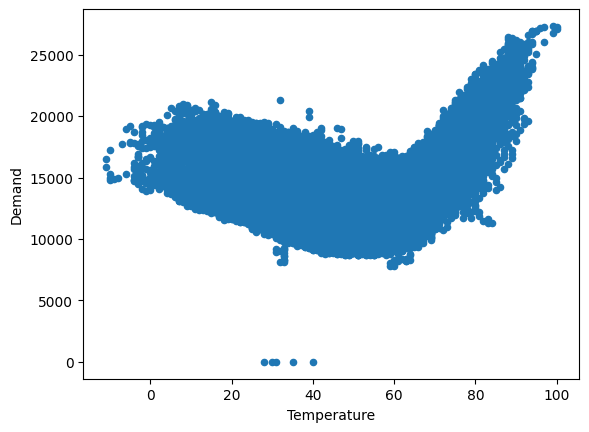

In [7]:
isone_ca.plot.scatter('Temperature', 'Demand')

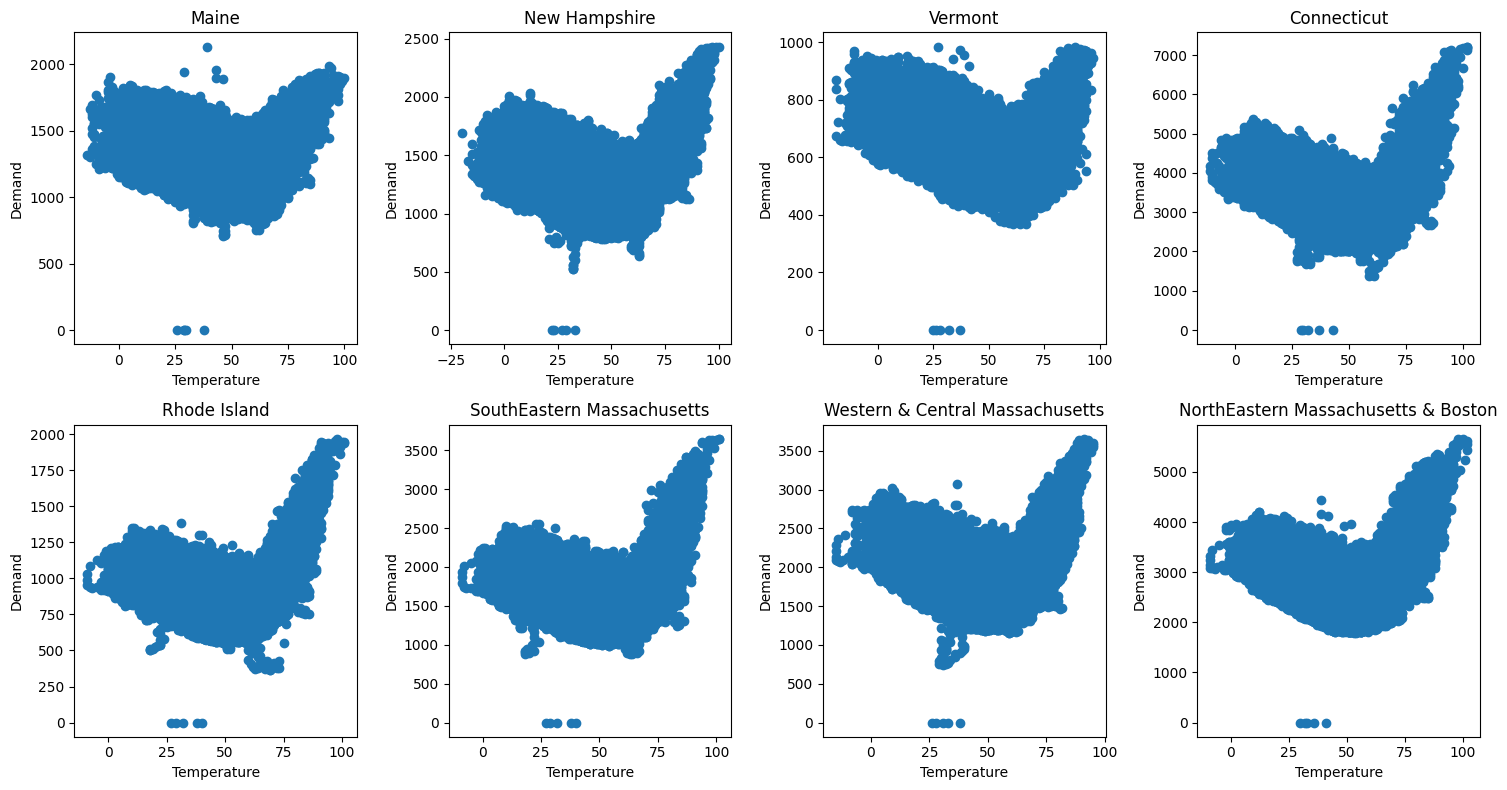

In [8]:
# Assuming `state_dfs` is a list of 8 DataFrames and `state_names` is a list of 8 titles
fig, axes = plt.subplots(2, 4, figsize=(15, 8))  # Creates a 2x4 grid of subplots

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each DataFrame and corresponding title
for i, (df, name) in enumerate(zip(state_dfs[1:], state_names_full[1:])):
    axes[i].scatter(df['Temperature'], df['Demand'])
    axes[i].set_title(name)
    axes[i].set_ylabel('Demand')
    axes[i].set_xlabel('Temperature')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()